<font color=black size=5>1. Reproducibility & readability

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import datetime
import seaborn as sns
import pylab as pl
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from functools import reduce
from torch.utils.data.dataloader import default_collate
torch.manual_seed(200205740)

<font color=black size=5>2. Supervised learning on Fashion-MNIST

<font color=black size=4>2.1 Data loading and inspection

2.1 a) Import the training and test data and transfer them into loader type.

In [137]:
batchSize=32
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5, 0.5)])

trainset = datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=False, num_workers=2)

trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=False, num_workers=2)

testset = datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, 
                                         shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
print('Training set size:', len(trainset))
print('Test set size:',len(testset))

Training set size: 60000
Test set size: 10000


2.1 b) Define a funtion that can display the images.

In [138]:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

In [139]:
image_tensor = trainset.data
label_tensor = trainset.targets


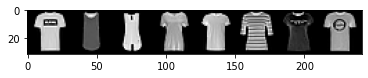

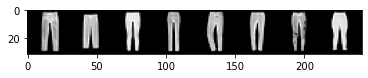

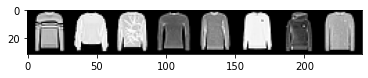

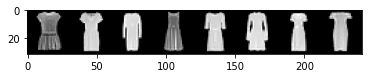

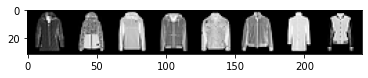

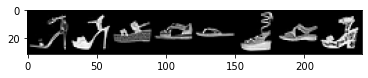

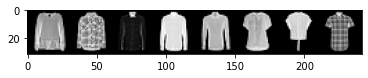

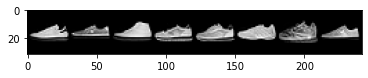

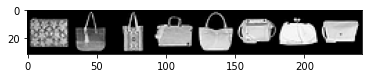

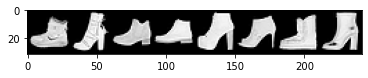

In [14]:
print_image = torch.tensor([])
for i in range(len(classes)):
    label_class = (label_tensor == i).nonzero()
    index = torch.transpose(label_class[:8], 0, 1)
    print_image = torch.unsqueeze(torch.index_select(image_tensor, 0, index.squeeze()),1) 
    imshow(torchvision.utils.make_grid(print_image))



<font color=black size=4> B2.2&B2.3 Evaluation metrics&Logistic regression

In [12]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        x = torch.sigmoid(x)
        return outputs

In [354]:
n_iters = 3000
epochs = 50
input_dim = 784
output_dim = 10
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizerLR = torch.optim.SGD(model.parameters(), lr=0.001)
optimizerL2 = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

B2.3 a) Define a logistic regression model function.

In [25]:
def default(test):    
    start = datetime.datetime.now()
    for epoch in range(int(epochs)):
        for i, (images, labels) in enumerate(trainloader):
            images = Variable(images.view(-1, 28 * 28))
            labels = Variable(labels)

            optimizerLR.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizerLR.step()
    total_params = sum(reduce( lambda a, b: a*b, x.size()) for x in model.parameters())
    end = datetime.datetime.now()
    
    
    correct = 0
    total = 0
    for images, labels in test:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
        accuracy = 100 * correct/total
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print("Training Time is: {}.".format(end - start))
    print("Total Params is: {}.".format(total_params))
    print("Accuracy: {}.".format(accuracy))


B2.3 b) Define a logistic regression model with L1 regularisation function.

In [26]:
def L1(test):
    start = datetime.datetime.now()
    for epoch in range(int(epochs)):
        for i, (images, labels) in enumerate(trainloader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            optimizerLR.zero_grad()
            outputs = model(images)

            classify_loss = criterion(outputs, labels)
            penalty = torch.sum(torch.abs(next(model.parameters())))
            loss = classify_loss + 0.01 * penalty

            loss.backward()
            optimizerLR.step()

    total_params = sum(reduce( lambda a, b: a*b, x.size()) for x in model.parameters())
    end = datetime.datetime.now()
    
    correct = 0
    total = 0
    for images, labels in test:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
        accuracy = 100 * correct/total
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print("Training Time is: {}.".format(end - start))
    print("Total Params is: {}.".format(total_params))
    print("Accuracy: {}.".format(accuracy))

B2.3 c) Define a logistic regression model with L2 regularisation function.

In [128]:
def L2(test):
    start = datetime.datetime.now()
    for epoch in range(int(epochs)):
        for i, (images, labels) in enumerate(trainloader):
            images = Variable(images.view(-1, 28 * 28))
            labels = Variable(labels)

            optimizerL2.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizerL2.step()
            
    total_params = sum(reduce( lambda a, b: a*b, x.size()) for x in model.parameters())
    end = datetime.datetime.now()
    
    correct = 0
    total = 0
    for images, labels in test:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
        accuracy = 100 * correct/total
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print("Training Time is: {}.".format(end - start))
    print("Total Params is: {}.".format(total_params))
    print("Accuracy: {}.".format(accuracy))

2.3 a) Report the M1 to M4 and plot a confusion matrix for test data.

C:\Users\86056\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Training Time is: 0:04:13.304344.
Total Params is: 7850.
[[5088   23   88  224   15    5  928    0   21    1]
 [  18 5763   13   58    5    0   15    0    5    1]
 [  90   30 4474   57  453    0  661    0   23    0]
 [ 277  144   60 5285  196    3  180    0   50    2]
 [  22   12  802  209 4878    0  626    0   22    0]
 [  11    0    9    1    5 5573   12  268   60  110]
 [ 432   24  503  144  415    2 3472    0  117    1]
 [   0    1    2    1    0  260    1 5453   33  188]
 [  61    3   49   21   33   37  103   10 5660    5]
 [   1    0    0    0    0  120    2  269    9 5692]]
Accuracy: 85.5633316040039.


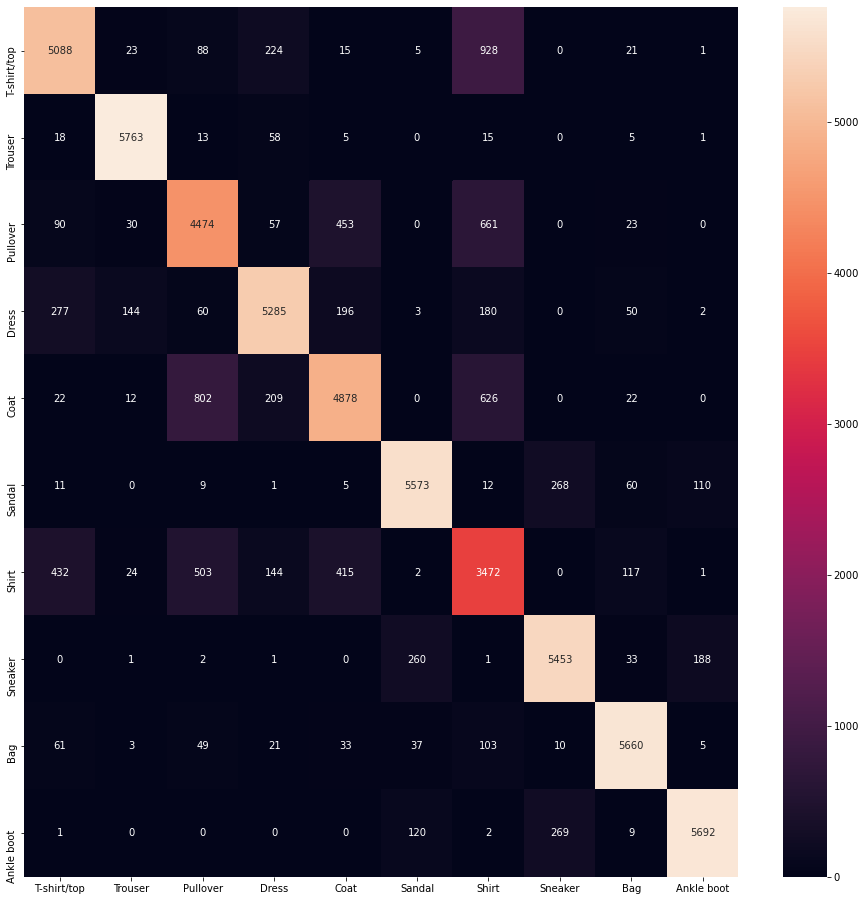

In [24]:
default(trainloader2)

0:04:15.420064
[[832   5  22  30   0   0 151   0   3   0]
 [  1 954   3  11   2   0   2   0   1   0]
 [ 14   3 725  16 101   0 126   0  10   0]
 [ 46  27  10 871  38   2  37   0  11   0]
 [  5   5 147  31 773   0 117   0   3   0]
 [  5   0   1   1   1 916   2  38   7  17]
 [ 85   4  85  35  76   0 538   0  19   0]
 [  0   0   0   0   0  49   0 917   6  39]
 [ 12   2   7   5   9   4  27   0 940   1]
 [  0   0   0   0   0  29   0  45   0 943]]
Accuracy: 84.08999633789062.


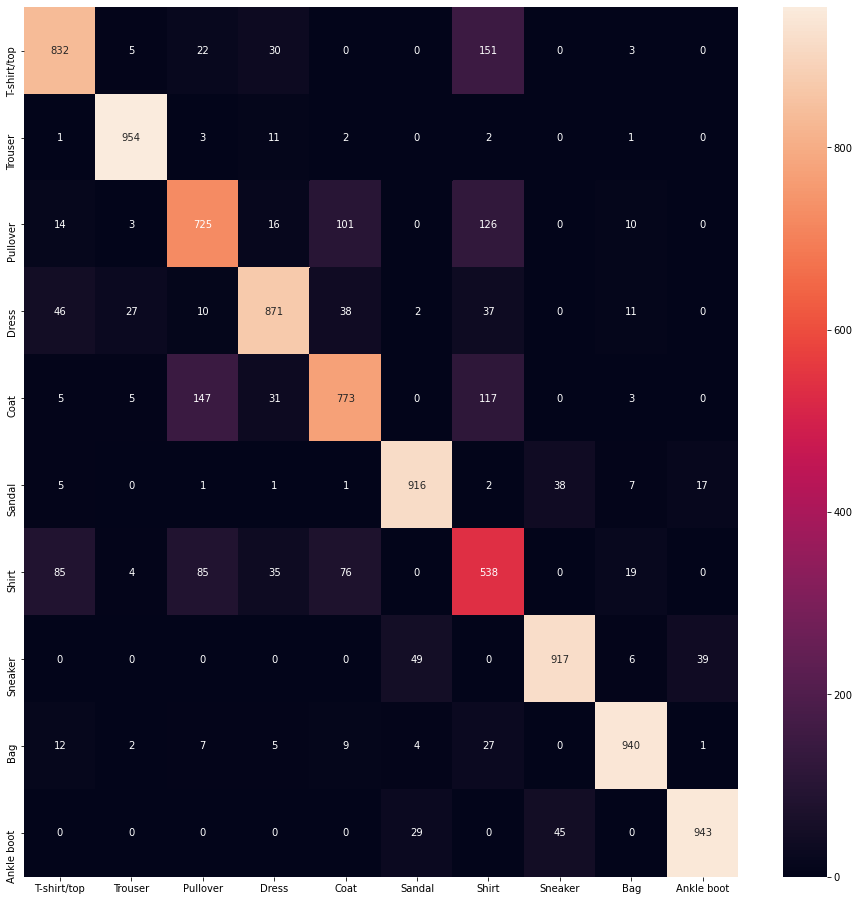

In [13]:
default(testloader)

2.3 b) Report the M1 to M4 and plot a confusion matrix for test data.

0:04:14.769119
[[4732   19  155  222   15    2 1264    0   17    1]
 [  56 5595   45   79   22    2   41    0    9    1]
 [  97   56 3923   64  617    1  783    0   87    3]
 [ 554  287   80 5185  312   14  303    0  167   15]
 [  22   17 1025  175 4525    0  978    0   27    0]
 [ 145   14  259  107  117 5072  293  469  270  133]
 [ 235    7  423  142  333    1 2106    0  150    1]
 [   3    1    1    0    0  576    1 5075  102  313]
 [ 150    4   85   26   59   60  227   22 5158   12]
 [   6    0    4    0    0  272    4  434   13 5521]]
Accuracy: 78.15333557128906.


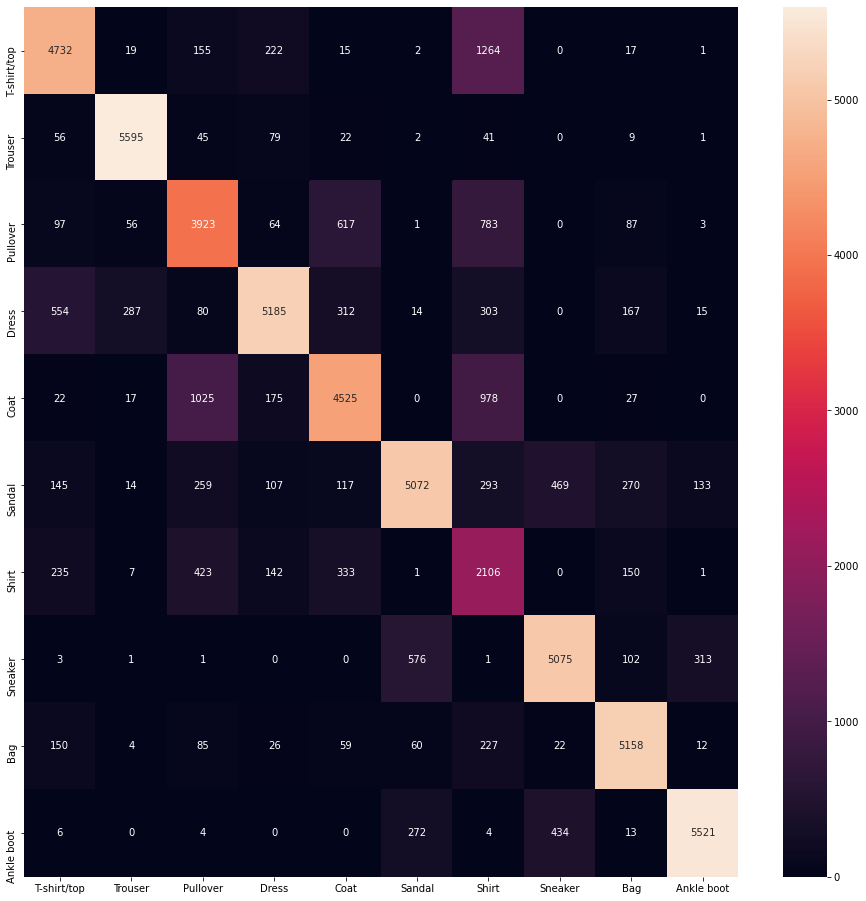

In [14]:
L1(trainloader2)

0:04:07.076552
[[779   7  36  44   4   0 206   0   1   0]
 [  7 924  14  14   2   0   2   0   2   0]
 [ 18  10 648   6 113   0 128   0  17   1]
 [ 90  52   9 843  39   3  55   0  30   1]
 [  9   3 173  32 743   0 173   0   1   0]
 [ 26   1  24  16  22 827  43  67  45  28]
 [ 49   1  81  39  68   0 345   0  25   0]
 [  0   0   0   1   0  96   1 852  15  48]
 [ 21   2  14   5   9  16  47   1 862   3]
 [  1   0   1   0   0  58   0  80   2 919]]
Accuracy: 77.41999816894531.


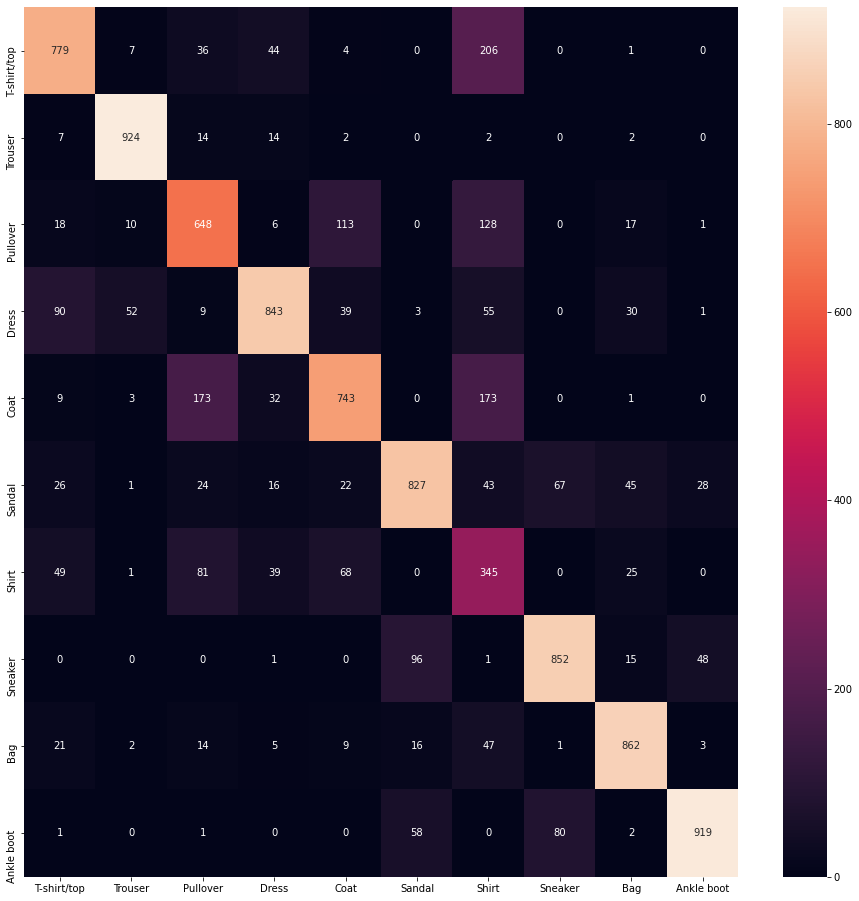

In [15]:
L1(testloader)

2.3 c) Report the M1 to M4 and plot a confusion matrix for test data.

Training Time is: 0:04:01.339915.
Total Params is: 7850.
Accuracy: 84.93499755859375.


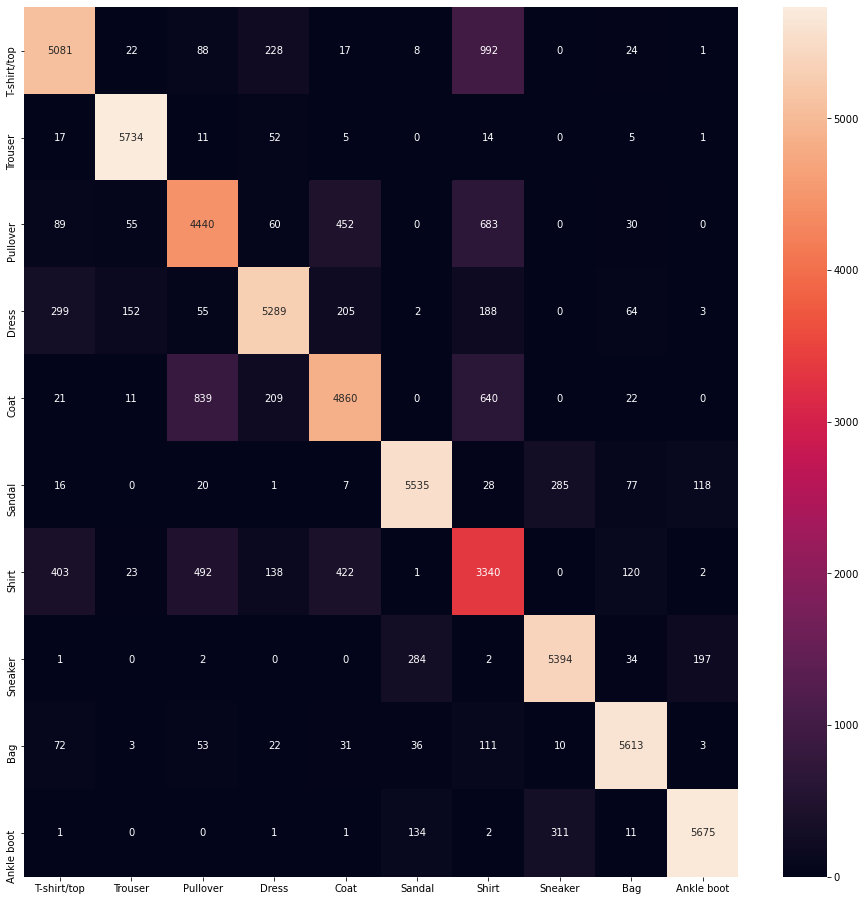

In [132]:
L2(trainloader2)

Training Time is: 0:03:58.174566.
Total Params is: 7850.
Accuracy: 83.45999908447266.


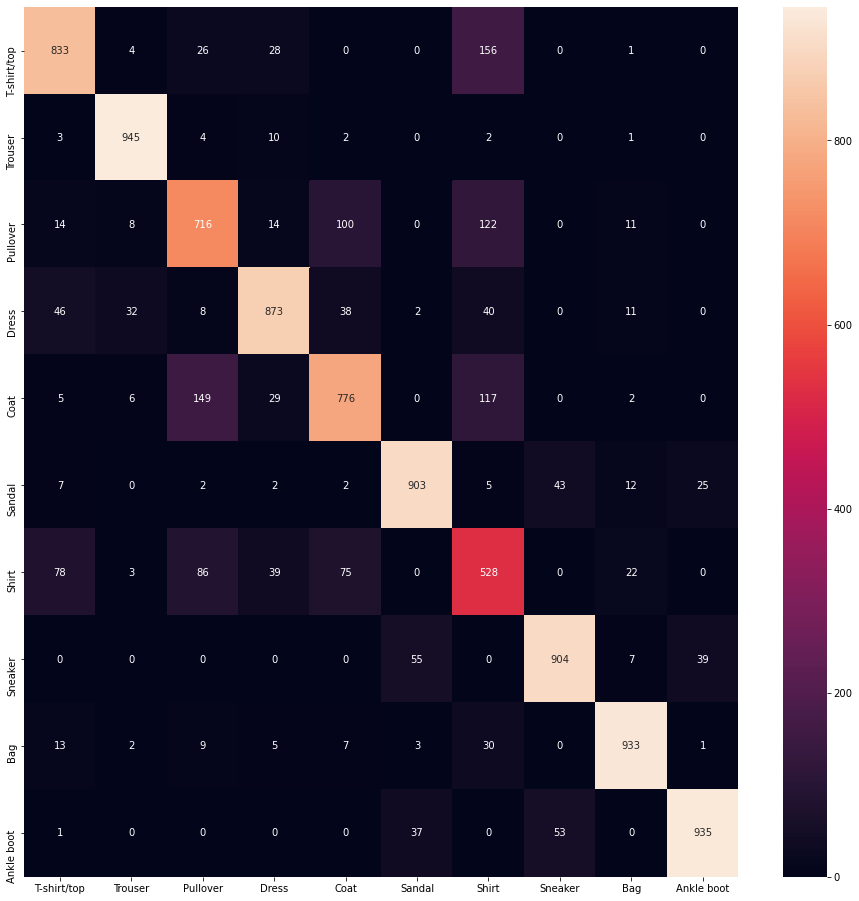

In [133]:
L2(testloader)

The result of B2.3:

|            Models           | Training Accuracy | Test Accuracy | Training Time | The number of learnable parameters |
|:---------------------------:|:-----------------:|:-------------:|:-------------:|:----------------------------------:|
| Default Logistic Regression |       85.56%      |     84.09%    |     04:13     |                7850                |
| Logistic Regression with L1 |       78.15%      |     77.42%    |     04:14     |                7850                |
| Logistic Regression with L2 |       84.93%      |     83.46%    |     04:01     |                7850                |

<font color=black size=4> B2.4 Convolutional Neural networks

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.01

C:\Users\86056\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Define a CNN class with 2 Conv layers and 2 FC layers;

In [30]:
class CNNC2F2(nn.Module):
    def __init__(self,num_classes=10):
        super(CNNC2F2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        self.fc1 = nn.Linear(7*7*32, 120)
        self.fc2 = nn.Linear(120, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Define a CNN class with 2 Conv layers and 5 FC layers;

In [31]:
class CNNC2F5(nn.Module):
    def __init__(self,num_classes=10):
        super(CNNC2F5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(7*7*32, 256)
        self.fc2 = nn.Linear(256, 144)
        self.fc3 = nn.Linear(144, 100)
        self.fc4 = nn.Linear(100, 32)
        self.fc5 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = self.fc5(out)
        return out

Define a CNN class with 5 Conv layers and 2 FC layers.

In [355]:
class CNNC5F2(nn.Module):
    def __init__(self,num_classes=10):
        super(CNNC5F2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 25, kernel_size=3, padding=1),
            nn.BatchNorm2d(25),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(25, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        
        self.fc1 = nn.Linear(7*7*256, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [356]:
modelC2F2 = CNNC2F2(10).to(device)
modelC5F2 = CNNC5F2(10).to(device)
modelC2F5 = CNNC2F5(10).to(device)

In [357]:
optimizerC2F2 = torch.optim.Adam(modelC2F2.parameters(), lr=learning_rate)
optimizerC5F2 = torch.optim.Adam(modelC5F2.parameters(), lr=learning_rate)
optimizerC2F5 = torch.optim.Adam(modelC2F5.parameters(), lr=learning_rate)

Training process of 2 Conv layers and 2 FC layers CNN and report M3.

In [34]:
num_epochs = 20
start = datetime.datetime.now()
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(trainloader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        outputs = modelC2F2(images)
        loss = criterion(outputs, labels)
        
        optimizerC2F2.zero_grad()
        loss.backward()
        optimizerC2F2.step()
        
end = datetime.datetime.now()
print("Training Time is: {}.".format(end - start))

Training Time is: 0:07:07.766955.


In [15]:
def testC2F2(test):
    modelC2F2.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test:
            images = Variable(images.float())
            labels = Variable(labels)
            outputs = modelC2F2(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print('Test Accuracy of the model of 2 convolutional layers and 2 FC layers is: {} %'.format(100 * correct / total))

Training process of 2 Conv layers and 5 FC layers CNN and report M3.

In [35]:
num_epochs = 20
start = datetime.datetime.now()
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(trainloader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        outputs = modelC2F5(images)
        loss = criterion(outputs, labels)

        optimizerC2F5.zero_grad()
        loss.backward()
        optimizerC2F5.step()
        
end = datetime.datetime.now()
print("Training Time is: {}.".format(end - start))
            

Training Time is: 0:09:20.013992.


In [42]:
def testC2F5(test):
    modelC2F5.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test:
            images = Variable(images.float())
            labels = Variable(labels)
            outputs = modelC2F5(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print('Test Accuracy of the model of 5 convolutional layers and 2 FC layers is:{} %'.format(100 * correct / total))

Training process of 5 Conv layers and 2 FC layers CNN and report M3.

In [358]:
num_epochs = 20
start = datetime.datetime.now()

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(trainloader):
        images = Variable(images.float())
        labels = Variable(labels)
    
        outputs = modelC5F2(images)
        loss = criterion(outputs, labels)
        
        optimizerC5F2.zero_grad()
        loss.backward()
        optimizerC5F2.step()
        
end = datetime.datetime.now()
print("Training Time is: {}.".format(end - start))

Training Time is: 0:27:54.407467.


In [359]:
def testC5F2(test):
    modelC5F2.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test:
            images = Variable(images.float())
            labels = Variable(labels)
            outputs = modelC5F2(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    cm = confusion_matrix(predicted,labels)
    print(cm)
    ax= plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, fmt='g',xticklabels = classes, yticklabels=classes)
    print('Test Accuracy of the model of 2 convolutional layers and 5 FC layers is: {} %'.format(100 * correct / total))

Report the M1, M2 and plot confusion matrices of 2 Conv layers and 2 fc layers.

[[5482    5  104   82    9    0  481    0    2    0]
 [   0 5958    0    7    1    0    2    0    0    0]
 [  22    2 5068    1  104    1  170    0    0    0]
 [  60   27   61 5710   99    0   72    0    3    2]
 [  28    4  487  109 5514    0  237    0    3    0]
 [   0    0    1    0    0 5927    0    5    2    7]
 [ 396    4  276   89  273    0 5034    0    8    0]
 [   0    0    0    0    0   68    0 5884    0   76]
 [  11    0    3    1    0    0    4    2 5980    1]
 [   1    0    0    1    0    4    0  109    2 5914]]
Test Accuracy of the model of 2 convolutional layers and 2 FC layers is: 94.11833333333334 %


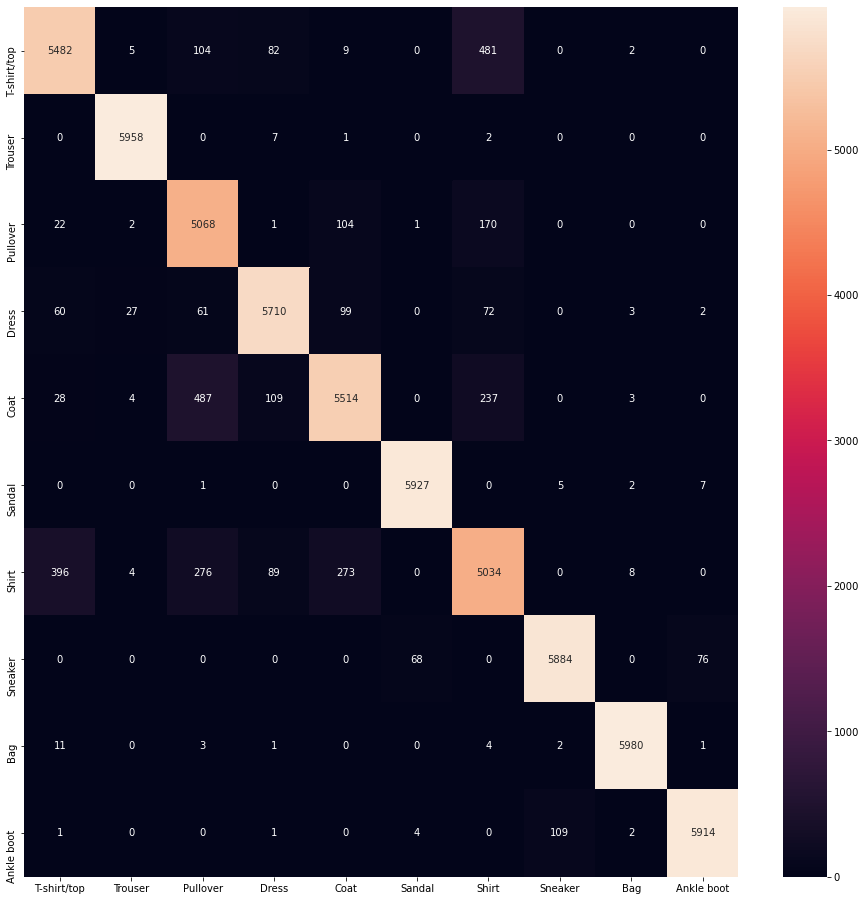

In [36]:
testC2F2(trainloader2)

[[846   1  21  29   3   1 112   0   3   0]
 [  0 973   1   6   0   0   1   0   0   0]
 [  9   0 813   4  37   0  42   0   0   0]
 [ 20  17  14 901  32   0  28   0   3   0]
 [  6   3  81  23 855   0  68   0   3   0]
 [  1   0   0   0   0 968   0   3   1   5]
 [113   4  70  37  71   0 740   0   5   2]
 [  0   0   0   0   0  24   0 973   2  28]
 [  5   2   0   0   2   0   8   0 981   0]
 [  0   0   0   0   0   7   1  24   2 965]]
Test Accuracy of the model of 2 convolutional layers and 2 FC layers is: 90.15 %


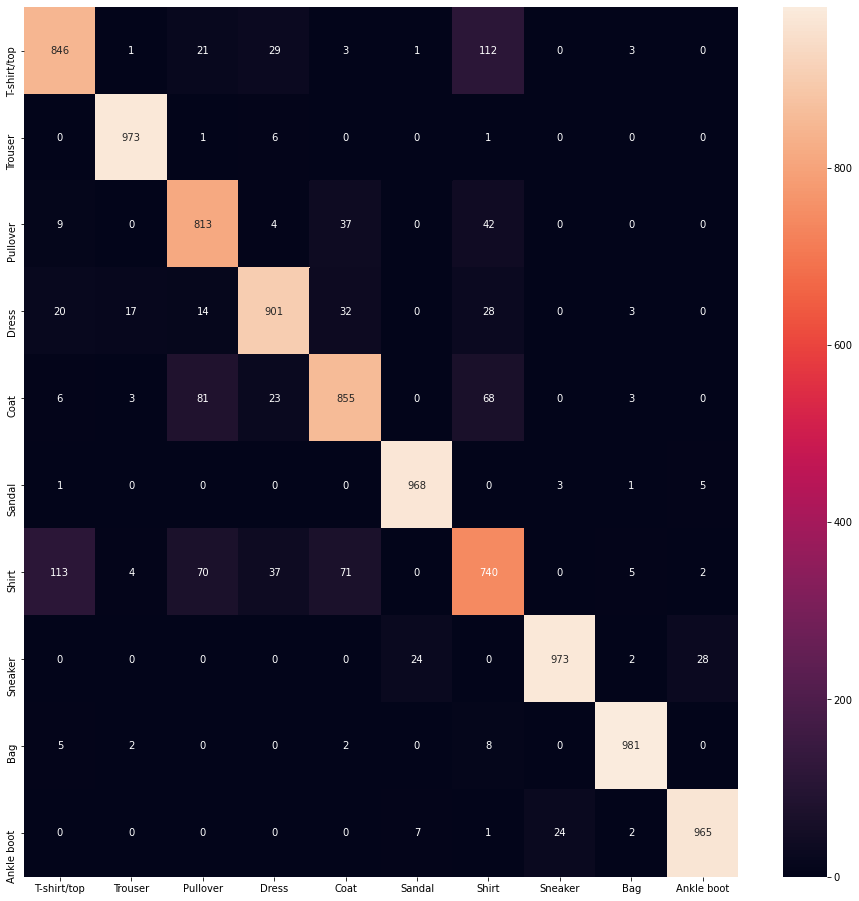

In [37]:
testC2F2(testloader)

Report the M1, M2 and plot confusion matrices of 2 Conv layers and 5 fc layers.

[[5214    1   62  163    2    0  657    0    1    0]
 [   0 5938    0   15    1    0    0    0    0    0]
 [  90    0 5565   16  580    0  669    0    3    0]
 [  51   15   33 5495  136    0   73    0   13    0]
 [   6   27  208  118 4990    1  312    0    7    0]
 [   0    0    0    0    0 5826    0   12    0    4]
 [ 623   18  131  191  289    2 4269    3   51    1]
 [   4    1    0    0    0  142    0 5864   17  175]
 [  12    0    1    2    2    1   20    2 5908    1]
 [   0    0    0    0    0   28    0  119    0 5819]]
Test Accuracy of the model of 5 convolutional layers and 2 FC layers is:91.48 %


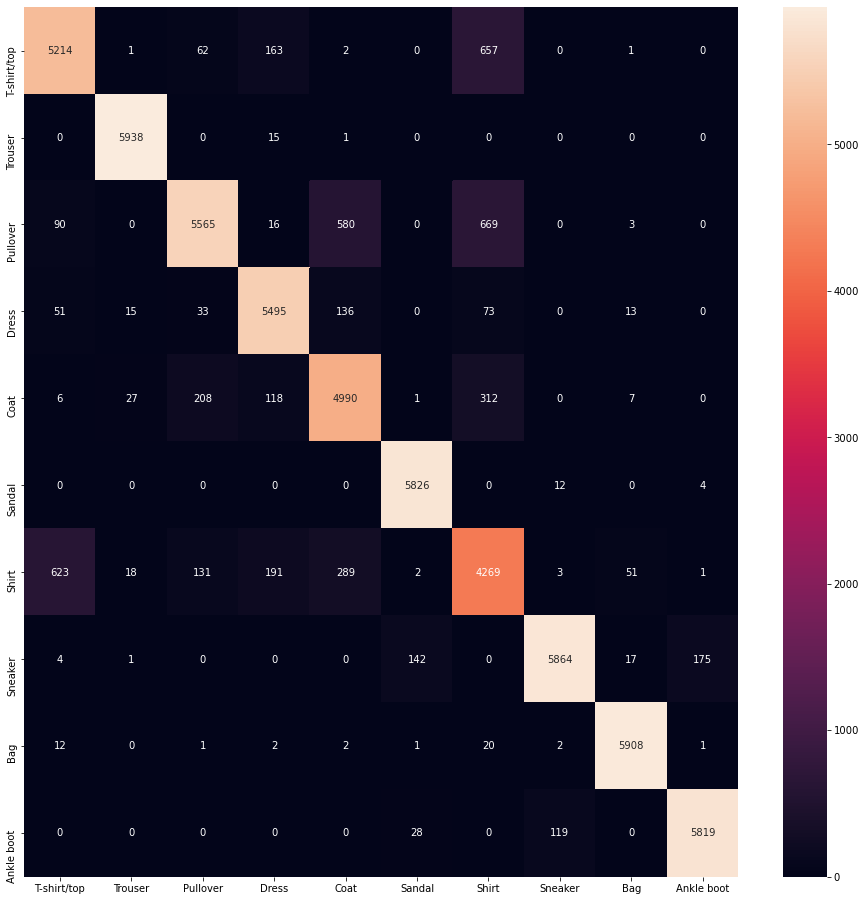

In [43]:
testC2F5(trainloader2)

[[856   2  12  32   1   0 123   0   2   0]
 [  0 970   0   6   1   0   0   0   0   0]
 [ 14   0 915   7 130   0 125   0   0   0]
 [  8   8   7 889  25   0  20   0   3   0]
 [  5   8  38  25 794   1  69   0   3   0]
 [  1   0   0   0   0 955   0   3   1   0]
 [110  10  28  39  48   2 656   0  12   2]
 [  1   0   0   1   0  33   0 984   7  39]
 [  5   2   0   1   1   1   7   0 972   0]
 [  0   0   0   0   0   8   0  13   0 959]]
Test Accuracy of the model of 5 convolutional layers and 2 FC layers is:89.5 %


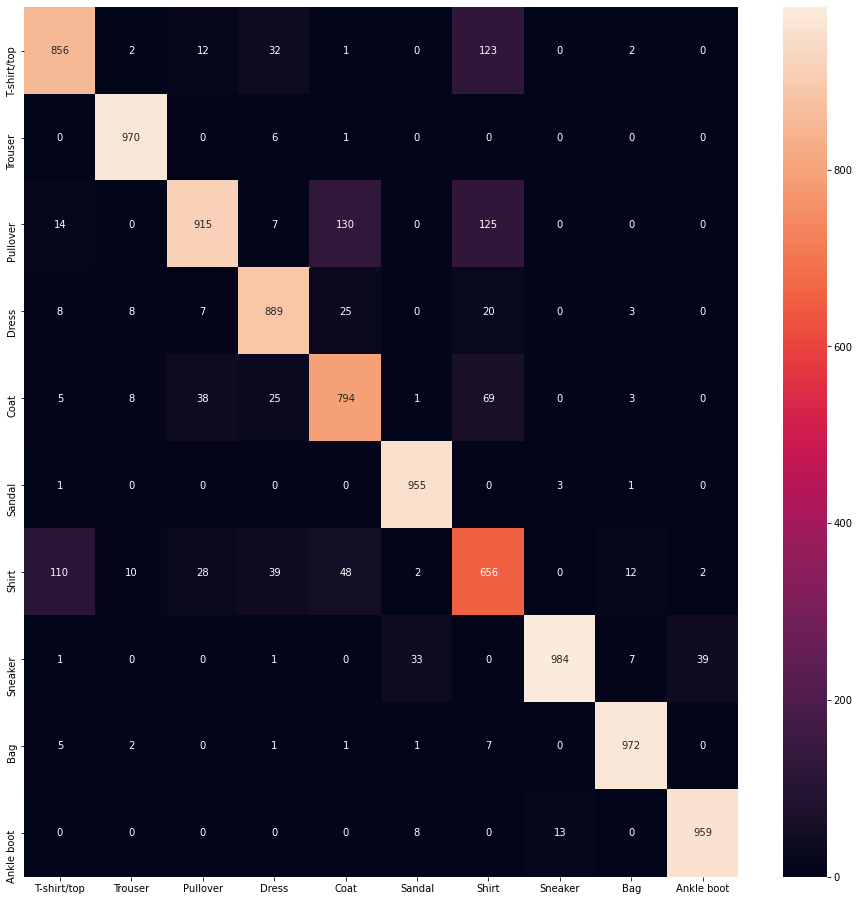

In [44]:
testC2F5(testloader)

Report the M1, M2 and plot confusion matrices of 5 Conv layers and 2 fc layers.

[[5909    0   12    1    0    0  127    0    0    0]
 [   0 5966    0    0    0    0    0    0    0    0]
 [   7    2 5836    4   28    0   43    0    3    0]
 [  42   28    9 5950   34    0   44    0    1    0]
 [   1    1  107   41 5913    0   76    0    4    0]
 [   1    0    0    0    0 6000    0   24    1    4]
 [  39    3   35    4   24    0 5709    0    0    0]
 [   0    0    1    0    0    0    0 5946    0   21]
 [   1    0    0    0    1    0    1    0 5991    0]
 [   0    0    0    0    0    0    0   30    0 5975]]
Test Accuracy of the model of 2 convolutional layers and 5 FC layers is: 98.65833333333333 %


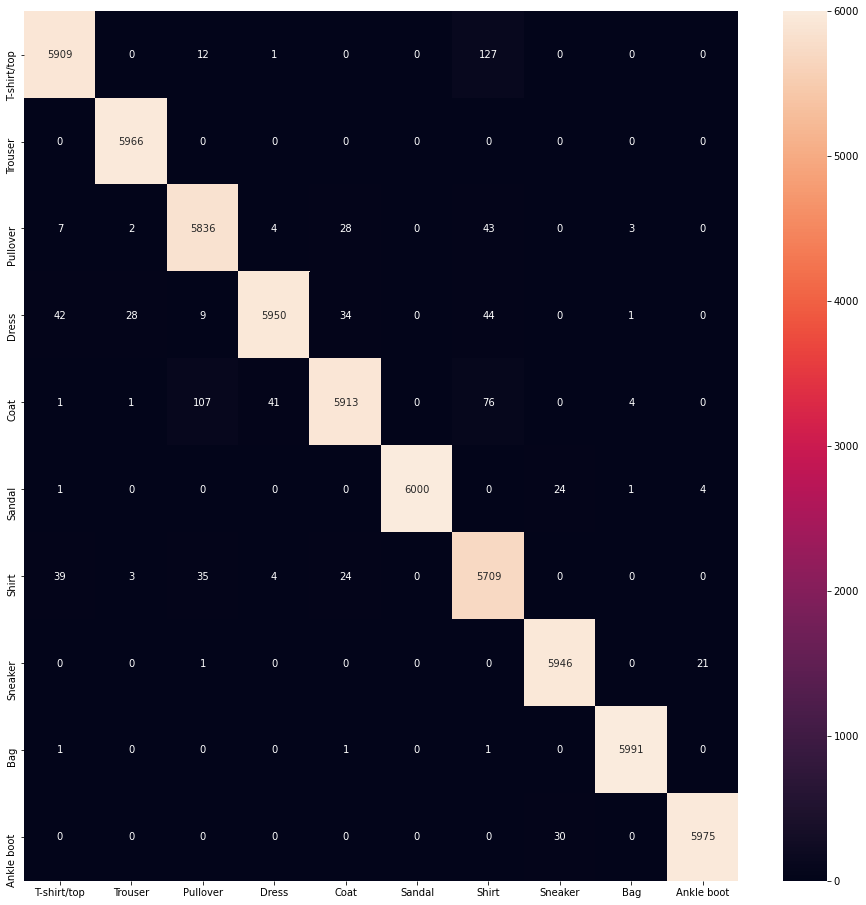

In [360]:
testC5F2(trainloader2)

[[858   1  18   9   2   0 112   0   1   0]
 [  0 970   0   2   0   0   0   0   0   0]
 [ 15   0 848   8  45   0  61   0   5   0]
 [ 29  22  13 927  24   1  39   0   5   0]
 [  6   2  62  31 895   0  93   0   3   0]
 [  4   0   0   1   0 988   0   9   2  11]
 [ 82   3  57  20  33   0 687   0   2   0]
 [  0   0   0   0   0   8   0 968   1  31]
 [  6   2   2   2   1   1   8   0 978   1]
 [  0   0   0   0   0   2   0  23   3 957]]
Test Accuracy of the model of 2 convolutional layers and 5 FC layers is: 90.76 %


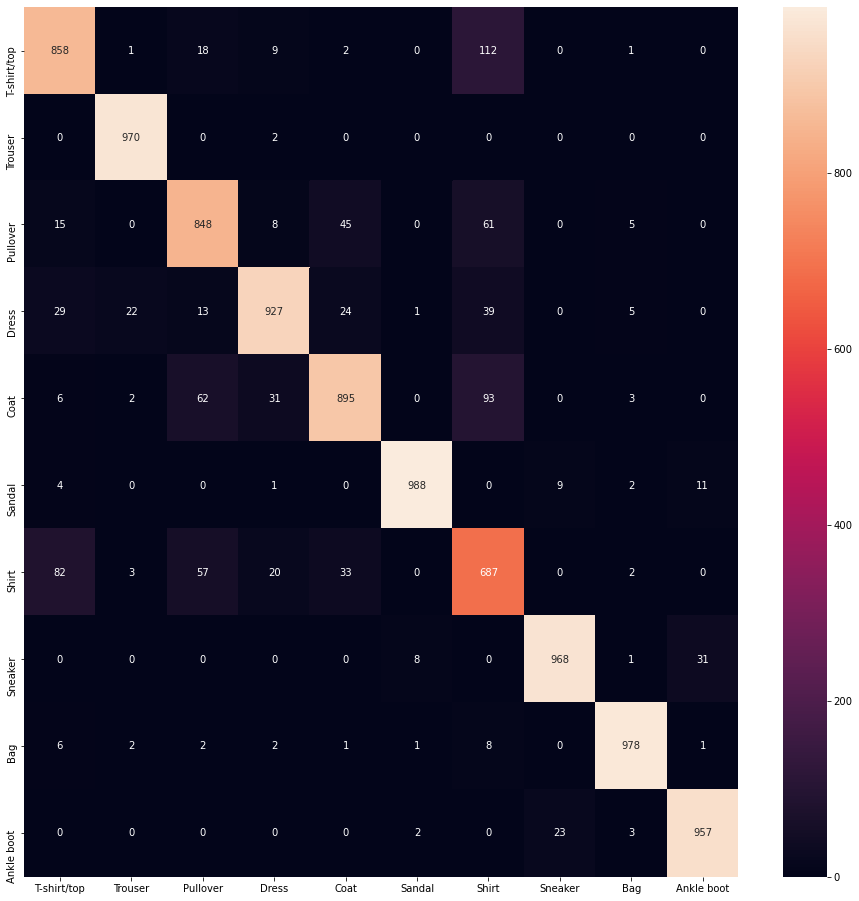

In [361]:
testC5F2(testloader)

Report the M4s for 3 models.

In [362]:
total_paramsC2F2 = sum(reduce( lambda a, b: a*b, x.size()) for x in modelC2F2.parameters())
total_paramsC2F5 = sum(reduce( lambda a, b: a*b, x.size()) for x in modelC2F5.parameters())
total_paramsC5F2 = sum(reduce( lambda a, b: a*b, x.size()) for x in modelC5F2.parameters())
print("Total params of 2 Conv layers and 2 FC layers CNN is {}.".format(total_paramsC2F2))
print("Total params of 2 Conv layers and 5 FC layers CNN is {}.".format(total_paramsC2F5))
print("Total params of 5 Conv layers and 2 FC layers CNN is {}.".format(total_paramsC5F2))

Total params of 2 Conv layers and 2 FC layers CNN is 194386.
Total params of 2 Conv layers and 5 FC layers CNN is 461630.
Total params of 5 Conv layers and 2 FC layers CNN is 3381565.


The results of B2.3:

|               Models              | Training Accuracy | Test Accuracy | Training Time | The number of learnable parameters |
|:---------------------------------:|:-----------------:|:-------------:|:-------------:|:----------------------------------:|
| 2 Conv layers and 2 FC layers CNN |       94.12%      |     90.15%    |     07:07     |               194386               |
| 2 Conv layers and 5 FC layers CNN |       91.48%      |     89.50%    |     09:20     |               461630               |
| 5 Conv layers and 2 FC layers CNN |       98.66%      |     90.76%    |     27:54     |               3381565               |

<font color=black size=5> B3. Unsupervised learning on Fashion-MNIST

The two chosen classes are "Trouser" and "Bag".

<font color=black size=4> B3.1 PCA and k-means

In [51]:
Trouser = (label_tensor == 1).nonzero()
Bag = (label_tensor == 8).nonzero()  
Trouser_Bag = torch.cat((Trouser,Bag),0)
index = torch.transpose(Trouser_Bag, 0, 1)
Trouser_Bag = torch.unsqueeze(torch.index_select(image_tensor, 0, index.squeeze()),1)

<ipython-input-51-acf40a1ff344>:1: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  Trouser = (label_tensor == 1).nonzero()


In [52]:
X = np.array(Trouser_Bag[:][0][0].numpy()).reshape(1, 28*28)
for i in range(1, len(Trouser_Bag[:])):
    X = np.append(X,np.array(Trouser_Bag[:][i][0].numpy()).reshape(1, 28*28),axis = 0)
X_norm = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)
lower_dimensional_data = pca.fit(X)
cov_matrix = np.dot(X_norm.T, X_norm) / len(X_norm)

for eigenvector in pca.components_[:24]:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

233.31487698519848
80.5895059134061
63.812555267169444
23.18489305140465
26.864720767646055
19.99160885171137
12.74453788848838
13.553183697691745
8.81845729693859
8.457554534151619
6.000323603116324
5.803474403324428
6.044316470392077
4.2373070930413625
6.590397441839596
4.197122023741372
3.687181517889548
4.616020870572423
3.4949951555351975
3.9764715081675956
4.5191666903007555
2.993619194322664
3.416094134755683
2.6035312472267713


a) The figure of descending corresponding values of top 24 eigenvectors.

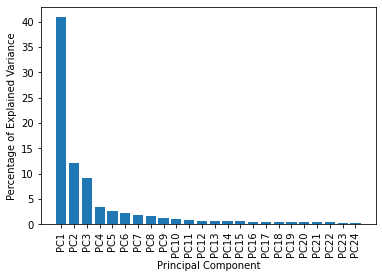

In [53]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
pca_labels = ['PC' + str(x) for x in range(1,25)]
per_var = per_var[:24]
plt.bar(x=range(1,25), height=per_var, tick_label = pca_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
pl.xticks(rotation=90)
plt.show()

b) Use the top 24 PCs to reconstruct 30 images.

In [54]:
def reconstruction(X, n, trans):
    vectors = [trans.components_[n] * X[n] for n in range(0, n)]
    ret = trans.inverse_transform(X)
    ret[ret < 0] = 0
    ret[ret > 1] = 1
    return ret

In [55]:
pca2 = PCA(n_components=24)
X_norm_r = pca2.fit(X_norm).transform(X_norm)

<ipython-input-56-6dff74edd486>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
<ipython-input-56-6dff74edd486>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
<ipython-input-56-6dff74edd486>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

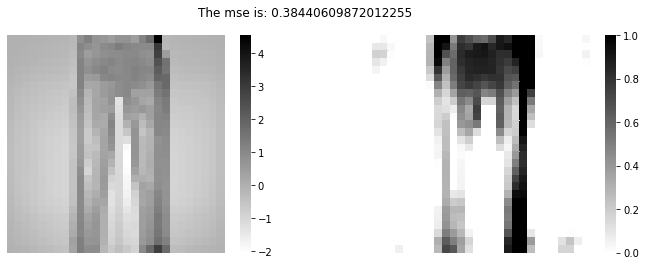

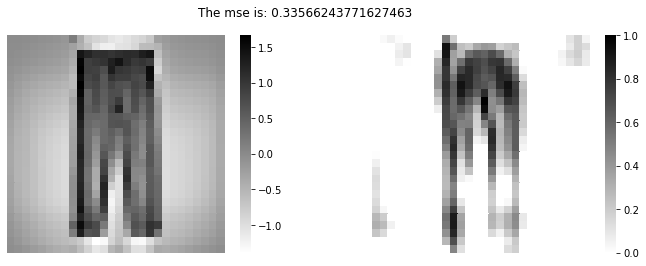

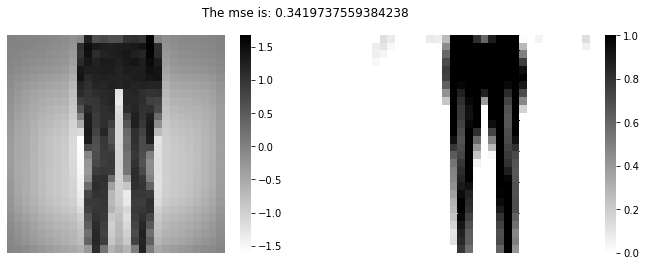

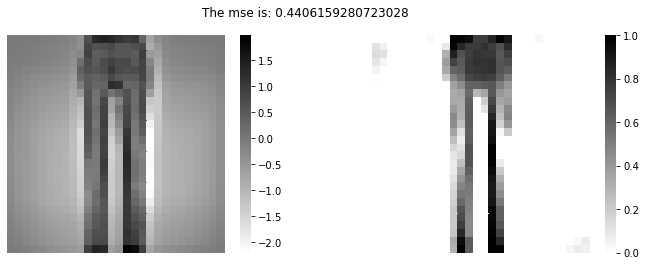

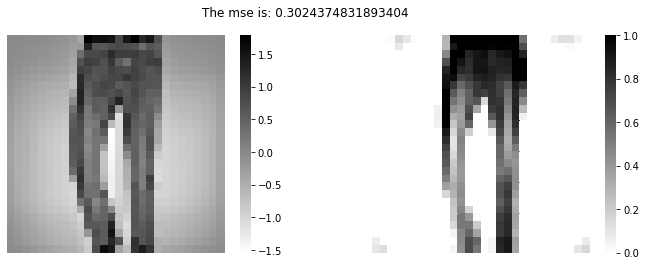

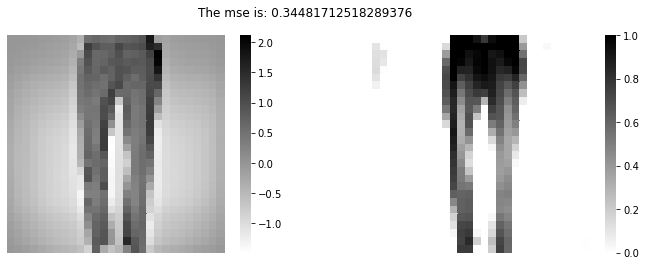

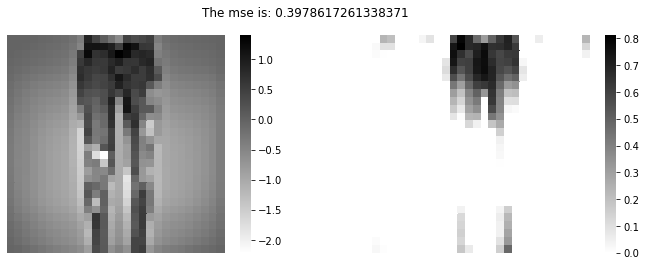

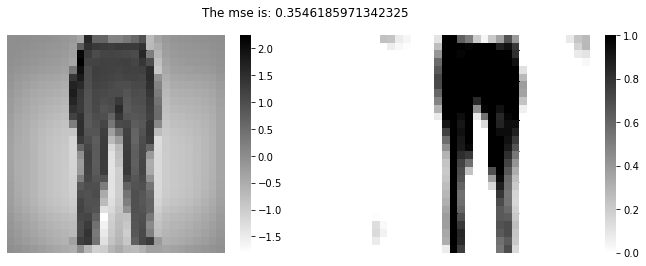

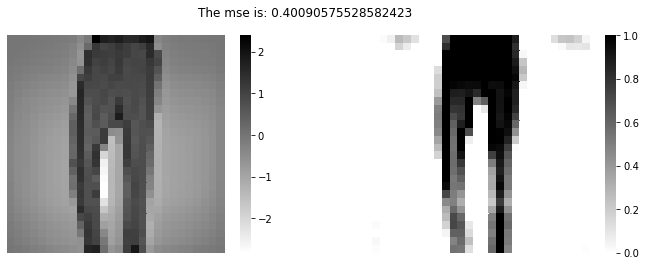

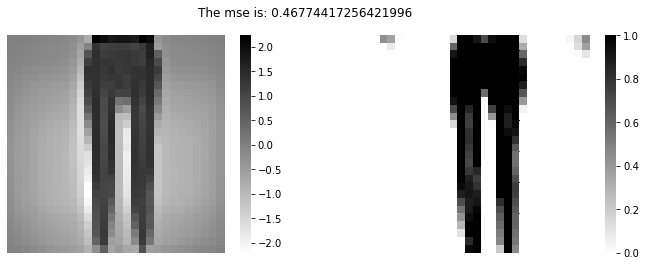

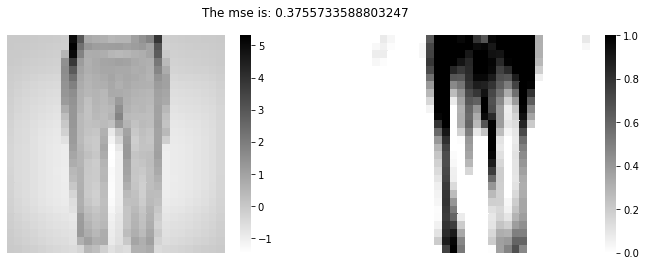

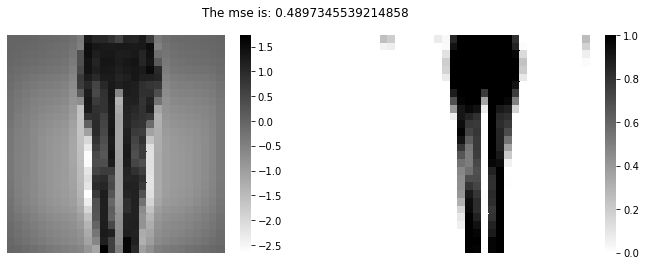

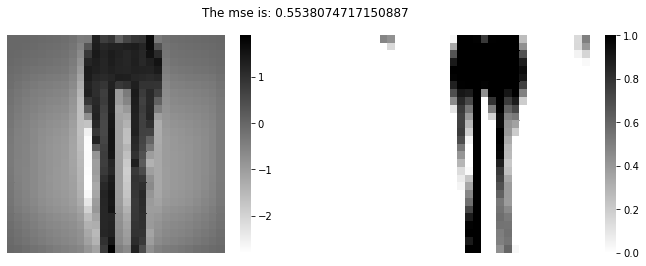

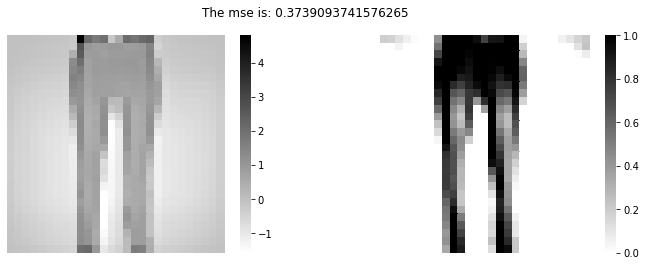

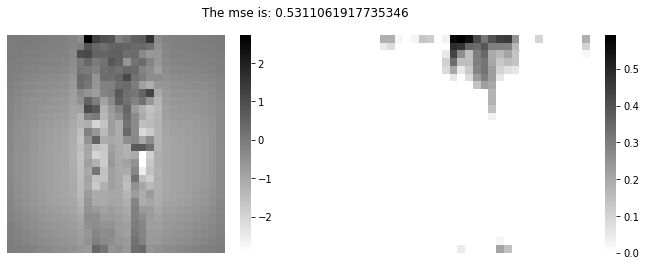

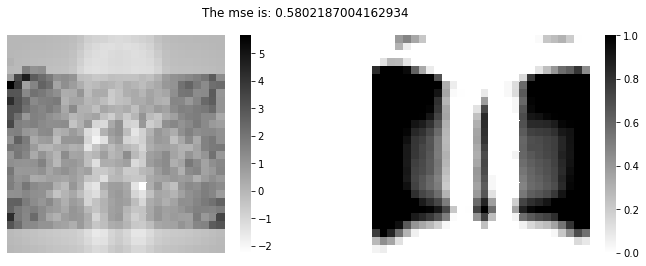

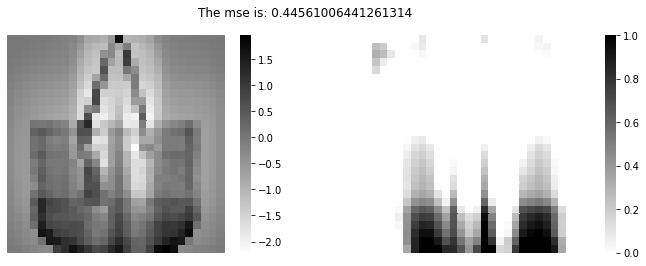

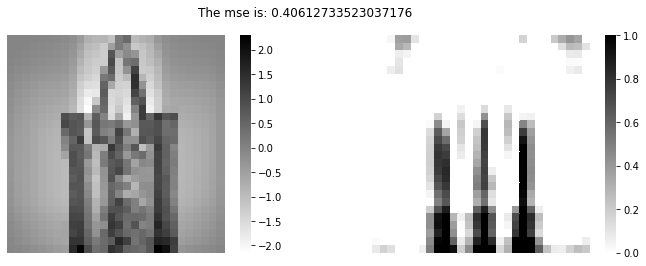

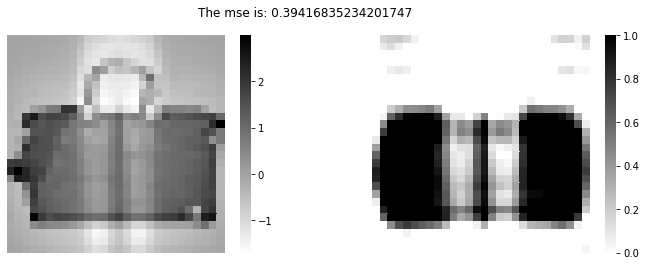

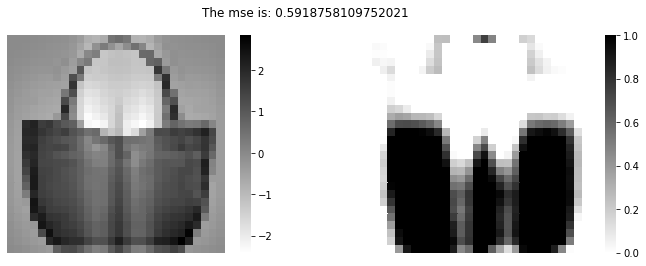

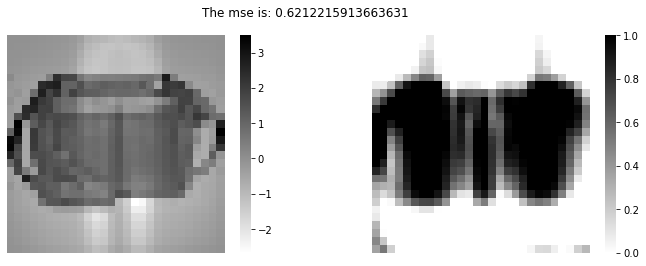

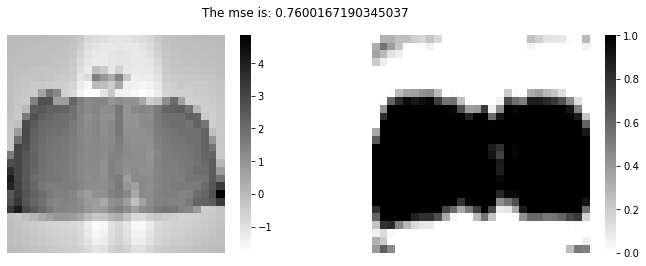

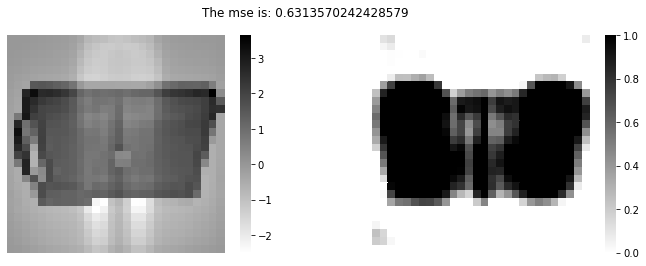

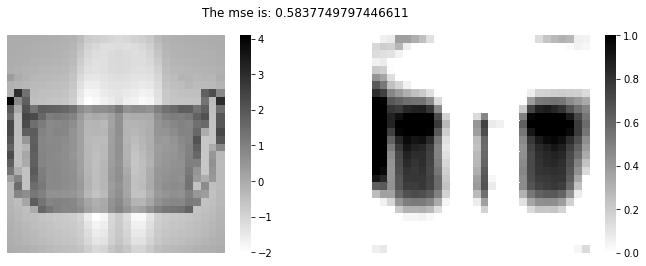

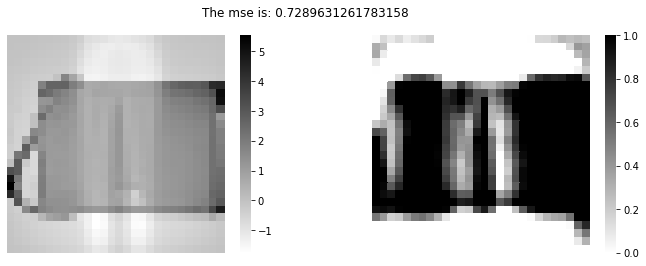

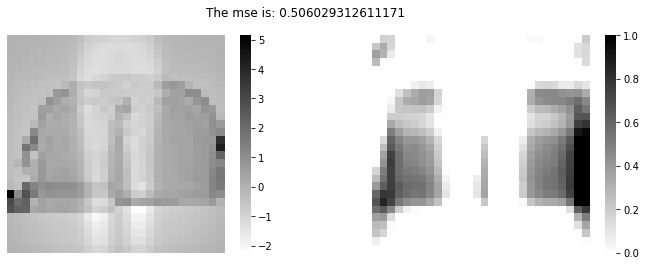

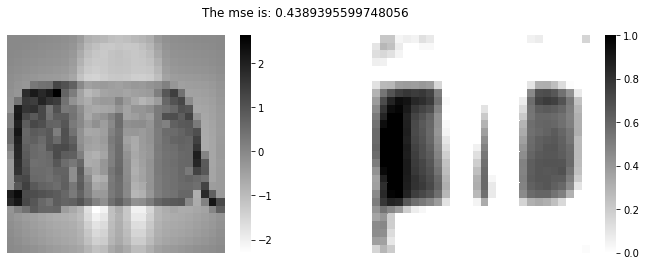

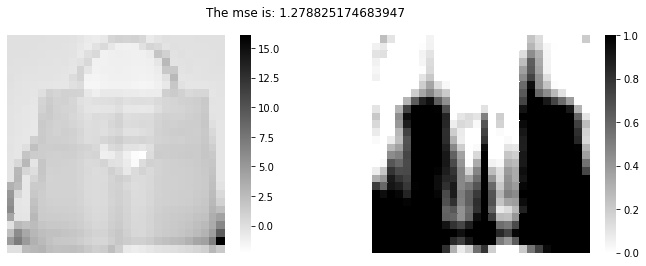

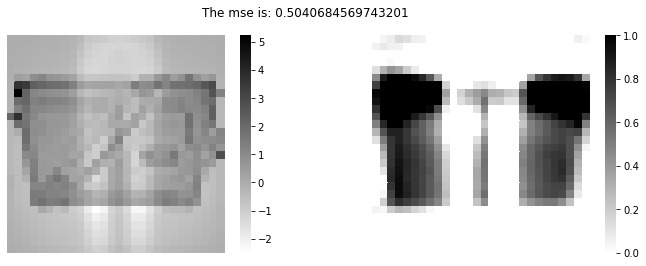

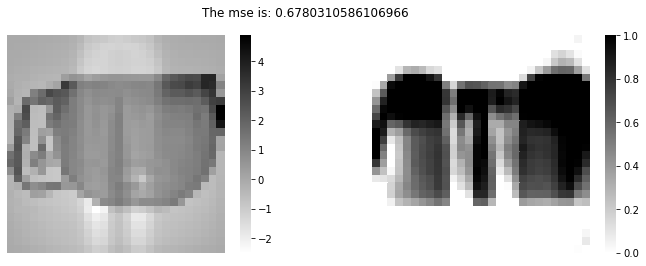

In [56]:
for i in range(15):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(X_norm[i, :].reshape(28, 28), cmap='gray_r',
                    ax=axarr[0])
    sns.heatmap(reconstruction(X_norm_r[i, :], 24, pca2).reshape(28, 28), cmap='gray_r',
                ax=axarr[1])
    error = mean_squared_error(X_norm[i, :],reconstruction(X_norm_r[i, :], 24, pca2))
    axarr[0].set_aspect('equal')
    axarr[0].axis('off')
    axarr[1].set_aspect('equal')
    axarr[1].axis('off')
    plt.suptitle('The mse is: {}'.format(error))

for i in range(15):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(X_norm[6000+i, :].reshape(28, 28), cmap='gray_r',
                    ax=axarr[0])
    sns.heatmap(reconstruction(X_norm_r[6000+i, :], 24, pca2).reshape(28, 28), cmap='gray_r',
                ax=axarr[1])
    error = mean_squared_error(X_norm[6000+i, :],reconstruction(X_norm_r[6000+i, :], 24, pca2))
    axarr[0].set_aspect('equal')
    axarr[0].axis('off')
    axarr[1].set_aspect('equal')
    axarr[1].axis('off')
    plt.suptitle('The mse is: {}'.format(error))

c) PCA representations of all data points using top 2 PCs.

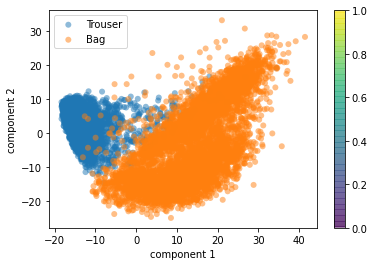

In [57]:
pca_2 = PCA(2)
X_2 = pca_2.fit_transform(X_norm)

T = plt.scatter(X_2[:6000, 0], X_2[:6000, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
B = plt.scatter(X_2[6000:, 0], X_2[6000:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.legend((T,B),('Trouser','Bag'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

d) Use k-means to cluster all data points as represented by the top two PCs.

In [352]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_2)
k_means_cluster_centers = kmeans.cluster_centers_
labelK = kmeans.labels_

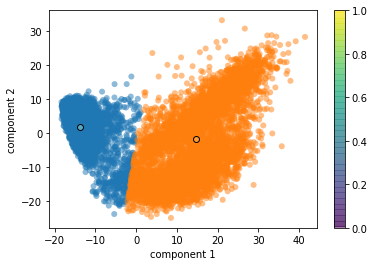

In [353]:
filtered_label0 = X_2[labelK == 0]
filtered_label1 = X_2[labelK == 1]
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.plot(k_means_cluster_centers[0][0], k_means_cluster_centers[0][1], 'o', markerfacecolor='#FF9C34',
            markeredgecolor='k', markersize=6)
plt.plot(k_means_cluster_centers[1][0], k_means_cluster_centers[1][1], 'o', markerfacecolor='#4EACC5',
            markeredgecolor='k', markersize=6)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


<font color=black size=4> B3.2 AutoEncoder

a) Define an autoencoder with five Conv2d layers and five ConvTranspose2d layers. 

In [157]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(6, 16, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(64, 256, 4)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 64, 4),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=2, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 6, 3, stride=2, padding=2, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 1, 3, stride=2, padding=2, output_padding=1),
            nn.Sigmoid()  
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [158]:
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(6, 16, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (7): ReLU()
    (8): Conv2d(64, 256, kernel_size=(4, 4), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (5): ReLU()
    (6): ConvTranspose2d(16, 6, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (7): ReLU()
    (8): ConvTranspose2d(6, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))


Define a sampler to get the trainloader of trouser and bag images.

In [159]:
class YourSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, mask, data_source):
        self.mask = mask
        self.data_source = data_source

    def __iter__(self):
        return iter([i.item() for i in torch.nonzero(mask)])

    def __len__(self):
        return len(self.data_source)
    
mask = [True if trainset.targets[i] == 1 or trainset.targets[i] == 8 else False for i in range(len(trainset))]
mask = torch.tensor(mask)   
sampler = YourSampler(mask, trainset)
loader = torch.utils.data.DataLoader(trainset, batch_size=32,sampler = sampler, shuffle=False, num_workers=10)

Training process

In [340]:
learning_rate=1e-3
max_epochs = 20

criterionMSE = nn.MSELoss() 
optimizerAE = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
outputs = []
recorder = []

for epoch in range(max_epochs):
    for data in loader:
        img, labels = data
        optimizerAE.zero_grad()
        recon = myAE(img)
        loss = criterionMSE(recon, img)
        loss.backward()
        optimizerAE.step()            
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)
    recorder.append((epoch,loss))

Epoch: 1
Epoch: 10
Epoch: 19


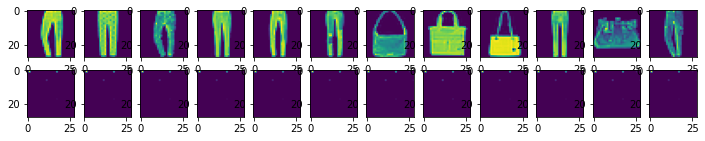

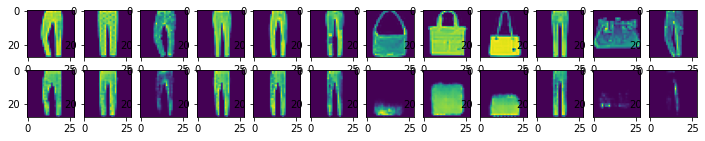

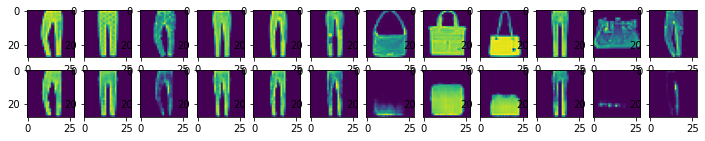

In [161]:
numImgs=12;
for k in range(0, max_epochs, 9):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].detach().numpy()    
    recon = outputs[k][2].detach().numpy()
    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.imshow(item[0])

<function matplotlib.pyplot.show(*args, **kw)>

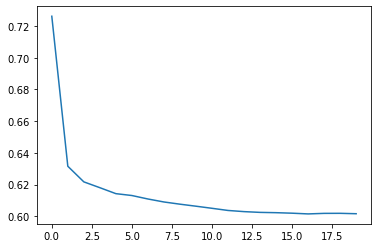

In [85]:
mse = []
epoch = []
for i in range(max_epochs):
    epoch.append(i)
    mse.append(recorder[i][1].detach().numpy())
plt.plot(epoch,mse)
plt.show

b) Modify the autoencoder in 3.2a.

In [337]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
           
            nn.Conv2d(1, 2, 2, stride=1),
            nn.LeakyReLU(),
            nn.Conv2d(2, 2, 3, stride=1),
            nn.LeakyReLU(),
            nn.Conv2d(2, 2, 3, stride=2),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(2, 2, 3, stride=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(2, 2, 2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2, 2, 4),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 2, 3, stride=2, padding=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 2, 3, stride=2, padding=2, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 2, 3, stride=2, padding=2, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 1, 3, stride=2, padding=2, output_padding=1),
            nn.Sigmoid() 
        )
        
    
    def encoder1(self,x):
        return self.encoder(x)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [338]:
myAE2=Autoencoder2()
print(myAE2)

Autoencoder2(
  (encoder): Sequential(
    (0): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(2, 2, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1))
    (8): LeakyReLU(negative_slope=0.01)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(2, 2, kernel_size=(2, 2), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(2, 2, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(2, 2, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(2, 2, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (5): ReLU()
    (6): ConvTran

In [336]:
loaderC = torch.utils.data.DataLoader(trainset, batch_size=12000,sampler = sampler, shuffle=False, num_workers=0)

In [341]:
optimizerAE2 = torch.optim.Adam(myAE2.parameters(), lr=1e-3, weight_decay=1e-5)

for epoch in range(20):
    for data in loaderC:
        img, labels = data
        optimizerAE2.zero_grad()
        recon = myAE2(img)
        loss = criterionMSE(recon, img)
        loss.backward()
        optimizerAE2.step()  
        
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    

Epoch:1, Loss:1.2572
Epoch:3, Loss:1.2561
Epoch:5, Loss:1.2549
Epoch:7, Loss:1.2538
Epoch:9, Loss:1.2526
Epoch:11, Loss:1.2515
Epoch:13, Loss:1.2503
Epoch:15, Loss:1.2491
Epoch:17, Loss:1.2479
Epoch:19, Loss:1.2466


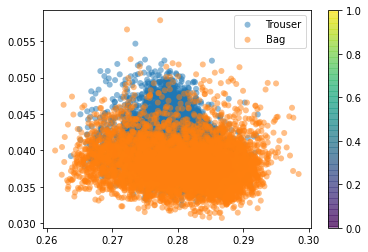

In [348]:
channel = myAE2.encoder1(img).squeeze().detach().numpy()
filtered_label0 = channel[labels == 8]
filtered_label1 = channel[labels == 1]
T = plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
B = plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.legend((T,B),('Trouser','Bag'))
plt.colorbar();

In [349]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(channel)
kmeans2_center = kmeans2.cluster_centers_
labelC = kmeans2.labels_

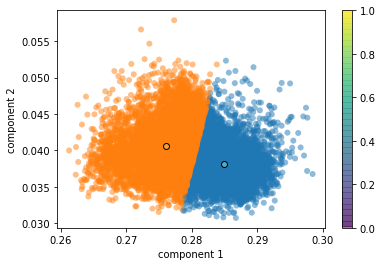

In [351]:
filtered_label0 = channel[labelC == 0]
filtered_label1 = channel[labelC == 1]
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.plot(kmeans2_center[0][0], kmeans2_center[0][1], 'o', markerfacecolor='#FF9C34',
            markeredgecolor='k', markersize=6)
plt.plot(kmeans2_center[1][0], kmeans2_center[1][1], 'o', markerfacecolor='#4EACC5',
            markeredgecolor='k', markersize=6)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<font color=black size=4> B3.3 Observation

1. In B3.1 b), the reconstructed trouser images look fine, but the reconstructed bag images have the outline of the trouser and look no longer like bags anymore.

2. In B3.2 b), if leak ReLU function is not used in the encoder structure, the data points may not be divided clearly and overlap.